# Opérations de symétrie sur la structure cristalline de l'oxyde de magnésium

In [2]:
#Importe la structure du matériau (MgO)
from pymatgen import MPRester

with MPRester("0GxLMrZ3A1RsWdHOh") as m:
    # Structure for material id
    structure = m.get_structure_by_material_id("mp-1009129")

In [3]:
#Retourne les symétries dans une liste d'objets SymmOp en coordonnées fractionnelles (par defaut)
from pymatgen.symmetry.analyzer import SpacegroupAnalyzer

SgA= SpacegroupAnalyzer(structure)
ConvStructure= SgA.get_conventional_standard_structure()
SgA_Conv = SpacegroupAnalyzer(ConvStructure)
OpDeSym=SgA_Conv.get_symmetry_operations()#Renvoie une liste avec les opérations de symétrie dans la structure conventionnelle



In [11]:
#Etude des effets de symétrie
from pymatgen.core.operations import SymmOp #Importe la classe SymOp pour effectuer les operations de symetries
#Détermination des coordonnées fractionnelles(réduites) des atomes
CoordMg1=ConvStructure.sites[0].frac_coords
CoordO1=ConvStructure.sites[1].frac_coords
CoordMg2=ConvStructure.sites[0].frac_coords + [0, 0, 1] #Pour avoir un 3e atome différent

#Application des opérateurs de symétrie
#Opération de symétrie pour le 1er atome
OpMg1=OpDeSym[8]
OpDeSym[8].operate(CoordMg1)
new_coordMg1=OpDeSym[8].as_xyz_string()

#Opération de symétrie pour le 2e atome
OpO1=OpDeSym[7]
OpDeSym[7].operate(CoordO1)
new_coordO1=OpDeSym[7].as_xyz_string()

#Opération de symétrie pour le dernier atome
OpMg2=OpDeSym[5]
OpDeSym[5].operate(CoordMg2)
new_coordMg2=OpDeSym[5].as_xyz_string()

Voici la structure conventionnelle:
 -------------------------------------------------------------------------------------------------- 


Structure Summary
Lattice
    abc : 2.9385135137175356 2.9385135137175356 2.67989347
 angles : 90.0 90.0 120.00000000000001
 volume : 20.04026900088922
      A : 1.4692567568587678 -2.5448273522432583 0.0
      B : 1.4692567568587678 2.5448273522432583 0.0
      C : 0.0 0.0 2.67989347
PeriodicSite: Mg (1.4693, -0.8483, 0.0000) [0.6667, 0.3333, 0.0000]
PeriodicSite: O (1.4693, 0.8483, 1.3399) [0.3333, 0.6667, 0.5000]

 -------------------------------------------------------------------------------------------------- 
On en retire 2 positions d'atomes:
Un atome de magnésium en: [0.66666667 0.33333333 0.        ]
Un atome d'oxygène en: [0.33333333 0.66666667 0.5       ]
Pour obtenir les coordonnées d'un 3e atome, on prend la position de l'atome de magnésium +1 dans la direction Z:
On a donc un deuxième atome de magnésium en: [0.66666667 0.33333333 1.        ]

On peut donc appliquer les opérations:
-Pour le premier atome de magnésium on effectue une rotation 
Les nouvelles coordonnées sont [x',y',z']= [ -x+y, y, -z ]
L'opérateur est le suivant:


Rot:
[[-1.  1.  0.]
 [ 0.  1.  0.]
 [ 0.  0. -1.]]
tau
[0. 0. 0.]

Graphiquement celà donne ceci:


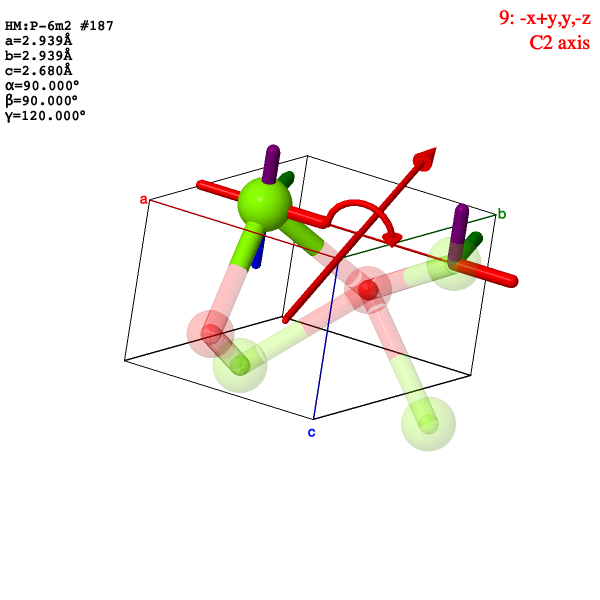

In [21]:
#Cellule pour l'affichage des résultats
from IPython.display import Image #package pour afficher les images de Jmol
print("Voici la structure conventionnelle:")
print(" -------------------------------------------------------------------------------------------------- ")
display(ConvStructure)
print(" -------------------------------------------------------------------------------------------------- ")
print("On en retire 2 positions d'atomes:")
print("Un atome de magnésium en:", CoordMg1)
print("Un atome d'oxygène en:", CoordO1)
print("Pour obtenir les coordonnées d'un 3e atome, on prend la position de l'atome de magnésium +1 dans la direction Z:")
print("On a donc un deuxième atome de magnésium en:", CoordMg2)
print("")
print("On peut donc appliquer les opérations:")
print("-Pour le premier atome de magnésium on effectue une rotation de 180° (2)")
print("Les nouvelles coordonnées sont [x',y',z']=","[",new_coordMg1,"]")
print("L'opérateur est le suivant:")
display(OpMg1)
print("Graphiquement cela donne ceci:")
display(Image(filename='JmolMg1.jpg'))

-Pour le premier atome d'oxygène on effectue une symétrie de plan miroir
Les nouvelles coordonnées sont [x',y',z']= [ x, x-y, z ]
L'opérateur est le suivant:


Rot:
[[ 1.  0.  0.]
 [ 1. -1.  0.]
 [ 0.  0.  1.]]
tau
[0. 0. 0.]

Graphiquement celà donne ceci:


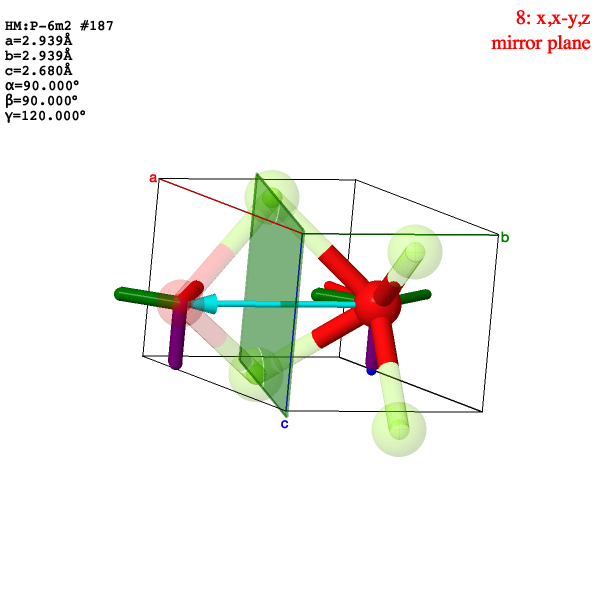

In [22]:
print("-Pour le premier atome de d'oxygène on effectue une réflexion (m ou -2)")
print("Les nouvelles coordonnées sont [x',y',z']=","[",new_coordO1,"]")
print("L'opérateur est le suivant:")
display(OpO1)
print("Graphiquement cela donne ceci:")
display(Image(filename='JmolO1.jpg'))

-Pour le second atome de de magnésium on effectue une symétrie de plan de glissement
Les nouvelles coordonnées sont [x',y',z']= [ -y, x-y, -z ]
L'opérateur est le suivant:


Rot:
[[ 0. -1.  0.]
 [ 1. -1.  0.]
 [ 0.  0. -1.]]
tau
[0. 0. 0.]

Graphiquement cela donne ceci:


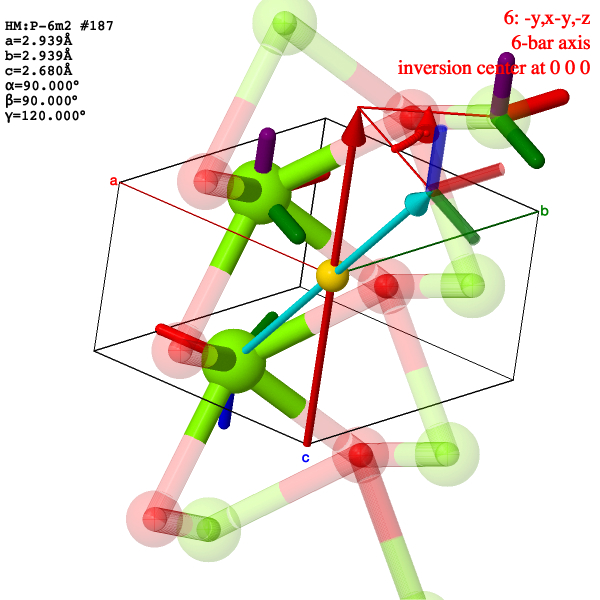

In [23]:
print("-Pour le second atome de de magnésium on effectue une roto-inversion d'ordre 6 (-6i)-")
print("Les nouvelles coordonnées sont [x',y',z']=","[",new_coordMg2,"]")
print("L'opérateur est le suivant:")
display(OpMg2)
print("Graphiquement celà donne ceci:")
display(Image(filename='JmolMg2.jpg'))